## Lab | Customer Analysis Round 7

Try to improve the linear regression model.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import math
from sklearn import linear_model

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#Getting the data 
df = pd.read_csv('marketing_customer_analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
#Show the dataframe shape.
df.shape

(9134, 24)

In [6]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### Processing the data 

**Split x, y**

In [7]:
#y,X split.separate the features from the labels
y = df['Total Claim Amount']
X = df.drop(['Total Claim Amount'], axis=1)

In [8]:
#We will use the column total_claim_amount later as the target variable

**Normalizing the data**

In [9]:
#categorical features and numerical ones are going to be treated differently
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)
X_num.head()
X_cat.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [10]:
# Normalizing and Standardizing data - only for numerical variables

In [11]:
X_num.head()
X_num.shape

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


(9134, 7)

In [ ]:
#Lets detect outliers (not done in previous labs)

In [34]:
# Exploration numerical features
df.describe(include=[np.number])

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


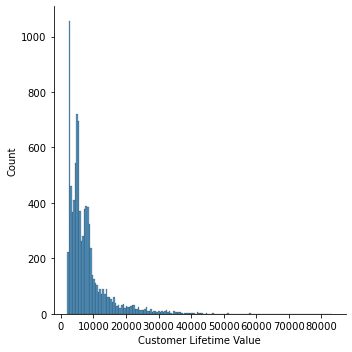

In [36]:
sns.displot(df['Customer Lifetime Value'])
plt.show()

<AxesSubplot:xlabel='Customer Lifetime Value'>

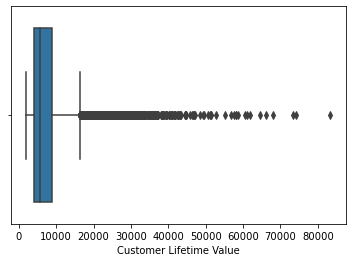

In [38]:
sns.boxplot(x=df['Customer Lifetime Value'])
plt.show()

8317

6279.177891973307

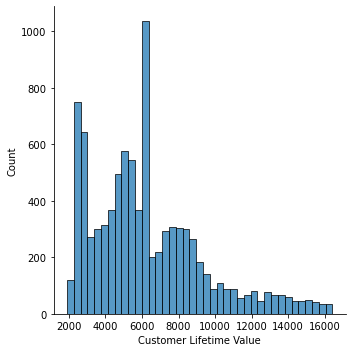

<AxesSubplot:xlabel='Customer Lifetime Value'>

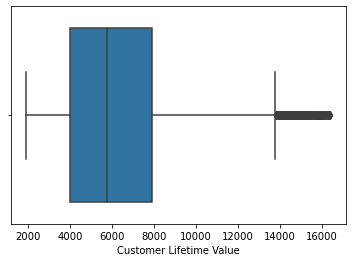

In [40]:
iqr = np.percentile(df['Customer Lifetime Value'],75) - np.percentile(df['Customer Lifetime Value'],25)
upper_limit = np.percentile(df['Customer Lifetime Value'],75) + 1.5*iqr
lower_limit = np.percentile(df['Customer Lifetime Value'],25) - 1.5*iqr
# We locate the outliers
lenghtValues=len(df[(df['Customer Lifetime Value']>lower_limit) & (df['Customer Lifetime Value']<upper_limit)])  # number of such observations.
lenghtValues
dataCLV = df.loc[(df['Customer Lifetime Value'] > lower_limit) & (df['Customer Lifetime Value'] < upper_limit)]
# dataCLV.head(10)
# # Now we calculate mean of the column, excluding the outliers
mean = np.sum(dataCLV['Customer Lifetime Value'])/lenghtValues
mean
# # Finally, we replace the outliers with the mean of the values that actually within the confidence interval
def replace_outliers_with_mean(x):
    if x < lower_limit:
        return mean
    elif x > upper_limit:
        return mean
    else:
        return x
df['Customer Lifetime Value'] = list(map(replace_outliers_with_mean,df['Customer Lifetime Value']))
# # The result is a less skweed distribution
sns.displot(df['Customer Lifetime Value'])
plt.show()
sns.boxplot(x=df['Customer Lifetime Value'])
plt.show()

In [52]:
# scaling standard scaler: make data normal distributed with mean=0 and std=1. In the previous lab we us MinMaxScaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns)

(9134, 7)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


In [53]:
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
x_normalized.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


**One Hot Encoding**

In [44]:
#One hot encoder
X_cat.head()
X_cat.shape

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


(9134, 16)

In [15]:
# We have 15 categorical variables. Do we do with all of them? Or just select some? 
#In previous labs we chose the variable Coverage.Let´s try now with the policy type.

In [16]:
X_cat.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [54]:
X_cat_reduced= X_cat[['Policy Type']] 
X_cat.head()
X_cat_reduced.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


,Policy Type
0,Corporate Auto
1,Personal Auto
2,Personal Auto
3,Corporate Auto
4,Personal Auto


In [55]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat_reduced)
print(encoder.categories_)
encoded = encoder.transform(X_cat_reduced).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded.head()

[array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


,Corporate Auto,Personal Auto,Special Auto
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [56]:
#because one of the variables can be deduced from the others, there is no point in keeping all these columns around.
#We drop one of them
onehot_encoded = onehot_encoded.drop(['Special Auto'],axis=1)
onehot_encoded.head()

,Corporate Auto,Personal Auto
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


### Concatenate data frames

In [57]:
# let's merge all this information together into a single dataset with all features, now numerical
X = pd.concat([x_normalized, onehot_encoded], axis=1)
X.head()
# X = pd.concat([X_num, onehot_encoded],axis=1)
# X.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,"(Corporate Auto,)","(Personal Auto,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,1.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,1.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,1.0


### Linear Regression
Apply linear regression model to our processed data.

In [58]:
y = df[['Total Claim Amount']]
y.head()

,Total Claim Amount
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6850, 9)
(2284, 9)
(6850, 1)
(2284, 1)


In [61]:
X_train.head()
X_test.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,"(Corporate Auto,)","(Personal Auto,)"
5114,0.181775,0.814155,0.181435,0.171429,0.191919,0.0,0.125,0.0,0.0
2438,0.007893,0.425651,0.016878,0.114286,0.353535,0.0,0.000,0.0,1.0
312,0.048892,0.858733,0.050633,0.085714,0.191919,0.0,0.625,1.0,0.0
4039,0.093805,0.624329,0.080169,0.628571,0.505051,0.4,0.125,1.0,0.0
5801,0.007938,0.410668,0.012658,0.171429,0.121212,0.0,0.000,1.0,0.0


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,"(Corporate Auto,)","(Personal Auto,)"
768,0.006673,0.000000,0.016878,0.200000,0.282828,0.0,0.000,0.0,1.0
1477,0.032330,0.346466,0.236287,0.657143,0.545455,0.4,0.000,0.0,1.0
3902,0.081089,0.791680,0.189873,0.342857,0.050505,0.0,0.750,0.0,0.0
2713,0.208231,0.000000,0.472574,0.685714,0.212121,0.0,0.125,1.0,0.0
165,0.072127,0.218802,0.029536,0.342857,0.282828,0.0,0.125,0.0,1.0


In [62]:
y_test.head()

,Total Claim Amount
768,312.000000
1477,466.318191
3902,508.800000
2713,1245.600000
165,465.414770


In [63]:
#we train/fit our model with our training set.
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [64]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our donations, not just repeating the values it has seen in the training data
from sklearn.metrics import r2_score
predictions = lm.predict(X_test)
predictions

array([[413.29287785],
       [562.34065771],
       [380.52479611],
       ...,
       [525.3064458 ],
       [553.3734151 ],
       [363.86715965]])

In [65]:
r2_score(y_test, predictions)

0.5163128775601437


We remove outliers to make the distribuition more similar to a normal shape, we use a differenct scaler method and we include  a different categorical variable. 

R2 SCORE IMPROVES BUT VERY SLIGHTLY ( from 0,5156 in the lab6 to 0,5136). Is not a remarkable change. 

In [ ]:
#Let´s  now change the size or our test data.

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1000)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8220, 9)
(914, 9)
(8220, 1)
(914, 1)


In [73]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [74]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_test)
predictions

array([[ 412.84623874],
       [ 566.6371976 ],
       [ 382.5864503 ],
       [ 975.38816605],
       [ 354.25609137],
       [ 282.76662193],
       [ 394.34852348],
       [ 346.19164621],
       [ 502.45291201],
       [ 362.36431966],
       [ 506.39251859],
       [ 202.53591668],
       [ 315.07941526],
       [ 351.45975409],
       [ 400.73547056],
       [ 249.71433044],
       [ 340.98008846],
       [ 149.05887325],
       [ 564.06363608],
       [ 182.08960478],
       [1052.9047516 ],
       [ 523.53467772],
       [ 487.66995129],
       [ 317.52396804],
       [ 561.32545752],
       [ 561.93127828],
       [ 382.32319762],
       [ 341.15982293],
       [ 345.80767955],
       [ 391.34042216],
       [ 672.08052904],
       [ 453.18548591],
       [ 329.62390864],
       [ 531.46599947],
       [ 359.77934051],
       [ 268.2961811 ],
       [ 369.19292803],
       [ 440.13362356],
       [ 242.17186161],
       [ 311.49355026],
       [ 615.16576229],
       [ 776.737

In [75]:
r2_score(y_test, predictions)

0.48249005369867304

r2 score is worst if we reduce the test size. 

In [ ]:
#Let´s make our test data bigger

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1000)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 9)
(2741, 9)
(6393, 1)
(2741, 1)


In [77]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [78]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_test)
predictions
r2_score(y_test, predictions)

array([[410.58330741],
       [563.10989557],
       [384.14867612],
       ...,
       [380.38936958],
       [544.57194539],
       [319.05606432]])

0.5180583180496334

We obtained a better R2 score now.